In [2]:
import math
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

ticker = 'AAPL '     # ticker del titolo
T = 28            # giorni a scadenza
r = 0.025       # tasso risk free
N = 7      # numero stadi

data = yf.download(ticker, period='1y', interval='1d')
prezzi_chiusura = data['Close'].values
v = prezzi_chiusura[-30:]

var = np.std(v) * 0.01 + 0.1  # deviazione standard degli ultimi 30 giorni (volatilità) ++++++++ fattore di sopravvalutazione
S0 = prezzi_chiusura[-1]   # ultimo prezzo


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
def UD_albero_binomiale(T,r,N,sigma):
  dt= (T/N)*1/365              # dt sarà la lunghezza dei periodi T/N espressa in anni
  a = np.exp(r * dt)           # fattore di accelerazione
  u = np.exp( sigma * np.sqrt(dt))      # fattore di rialzo
  d = 1/u                               # fattore di rialzo
  q = (a - d) / (u - d)                 # prob. di rialzo
  return u,d,q

In [4]:
def probabilità_binomiale(n,k,p):
  probabilità=math.comb(n,k) * (p**k) * ((1 - p)**(n - k))
  return probabilità

In [5]:
def albero_binomiale(t, S0, r, N, u, d, q):
    """
    Funzione per generare e visualizzare un albero binomiale dei prezzi di un sottostante.

    Parameters:
    - t: Tempo di scadenza in giorni.
    - S0: Prezzo iniziale del sottostante, nonchè il prezzo iniziale.
    - r: Tasso di interesse privo di rischio.
    - N: Numero di passi temporali.
    - u: Fattore di rialzo.
    - d: Fattore di ribasso.
    - q: Probabilità di rialzo.
    - opttype: Tipo di opzione call o put.
    """
    T=(t/N)*1/365

    # Creazione dell'albero dei prezzi del sottostante
    S = np.zeros((N + 1, N + 1))  # Albero dei prezzi
    S[0, 0] = S0

    # Popolazione dell'albero dei prezzi del sottostante
    for i in range(1, N + 1):       # i = numero rialzi
        for j in range(i + 1):      # j = numero ribassi
            S[j, i] = S0 * (u**(i - j)) * (d**j)  # output finale per ogni nodo

    # Creazione del grafico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Tracciamo i nodi
    for i in range(N + 1):
        for j in range(i + 1):
            # Posizione su Y: centralizzare rispetto a S0
            y_pos = (i // 2) - j  # Posizioniamo i nodi sopra e sotto S0
            color = 'blue' if y_pos >= 0 else 'red'  # Azzurro per rialzi, rosso per ribassi

            # Tracciamo il nodo
            ax.text(i, y_pos, f'{S[j, i]:.2f}', ha='center', va='center', fontsize=10, color=color)

    # Impostazioni del grafico
    ax.set_title(f'Albero Binomiale dei Prezzi per {ticker} (scadenza a T={T*365*N} giorni)')
    ax.set_xlabel(f'Passi Temporali (N = {N})')
    ax.set_ylabel('Prezzo del Sottostante')

    # Impostazioni degli assi
    ax.set_xticks(np.arange(N + 1))  # Impostiamo un nodo per ogni passo temporale
    ax.set_xticklabels([f'{i}' for i in range(N + 1)], fontsize=9)
    ax.set_yticks(np.arange(-(N // 2), (N // 2) + 1, 1))  # Asse Y centrato su S0
    ax.set_yticklabels([f'{i}' for i in range(-(N // 2), (N // 2) + 1)], fontsize=9)

    # Limiti per evitare sovrapposizioni
    ax.set_xlim(-1, N + 1)
    ax.set_ylim(-(N // 2) - 1, (N // 2) + 1)

    # Aggiunta della griglia
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

    return S

In [6]:


# Funzione per calcolare il valore atteso di un'opzione call o put

def opzione_binomiale(p, u, d, S0, T, K, r, n, type="call"):
    """
    Calcola il valore atteso di un'opzione call o put con il modello binomiale.
    Restituisce il valore atteso dell'opzione, attualizzato al tasso risk-free.

    Parameters:
    p : probabilità di rialzo (probabilità di successo).
    u : fattore di rialzo.
    d : fattore di ribasso.
    S0 : prezzo iniziale.
    T : giorni a scadenza.
    K : strike price.
    r : tasso d'interesse risk-free.
    n : numero di passi (step) nel modello binomiale.
    tipo_opzione : tipo dell'opzione (call o put).
    """

    # passo temporale in anni
    dt=T/252

    # Fattore di attualizzazione
    att = math.exp(-r * dt)

    # Calcolare il valore atteso
    valore_atteso = 0
    for j in range(n+1):
        # Calcolare il prezzo dell'asset al passo j
        prezzo_j = S0 * (u**j) * (d**(n-j))

        if type == "call":
            # Calcolare il payoff dell'opzione call
            payoff = max(prezzo_j - K, 0)
        elif type == "put":
            # Calcolare il payoff dell'opzione put
            payoff = max(K - prezzo_j, 0)
        else:
            raise ValueError("Errore: digitare type")

        # Aggiungere al valore atteso
        valore_atteso += probabilità_binomiale(n,j,p) * payoff

    # Attualizzare il valore atteso
    valore_atteso *= att

    return valore_atteso


C:\Users\Gabriele\AppData\Local\Temp\ipykernel_16296\3056726499.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[0, 0] = S0
C:\Users\Gabriele\AppData\Local\Temp\ipykernel_16296\3056726499.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[j, i] = S0 * (u**(i - j)) * (d**j)  # output finale per ogni nodo


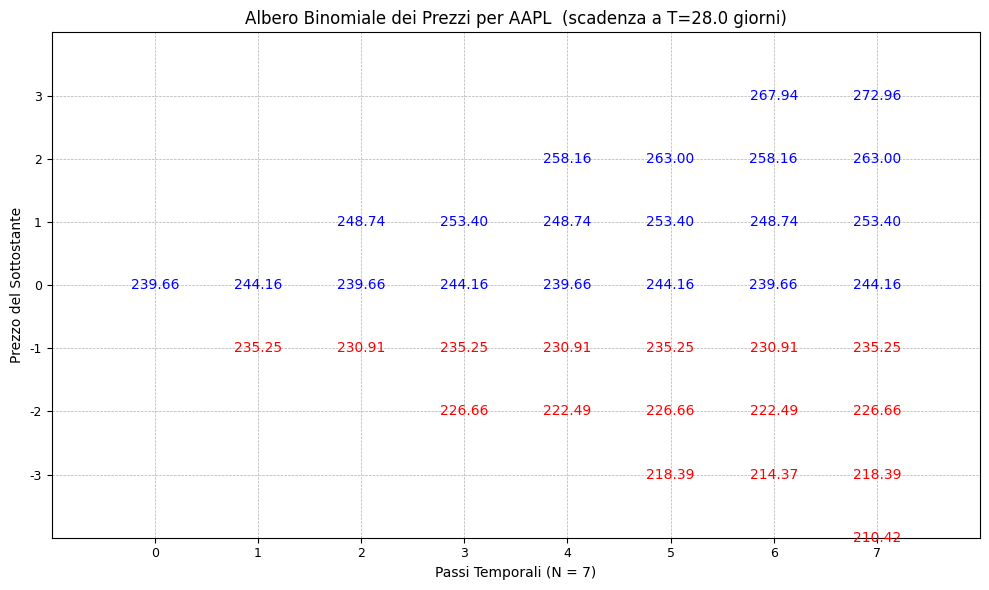

In [7]:
# calcoliamo il fattore di rialzo, di ribasso e la probabilità di rialzo
u,d,q = UD_albero_binomiale(T,r,N,var)

# calcoliamo e rappresentiamo l'albero
s = albero_binomiale(T,S0,r,N,u,d,q)
